# FreeSurfer

**Author:** Steffen Bollmann

**Date:** 17 Oct 2024

### Citation and Resources:

#### Tools included in this workflow
__FreeSurfer:__
- Fischl B. (2012). FreeSurfer. NeuroImage, 62(2), 774–781. [https://doi.org/10.1016/j.neuroimage.2012.01.021](https://doi.org/10.1016/j.neuroimage.2012.01.021)

#### Dataset
__MP2RAGE T1-weighted average 7T model (human brain model)__

- Bollmann, Steffen, Andrew Janke, Lars Marstaller, David Reutens, Kieran O’Brien, and Markus Barth. “MP2RAGE T1-weighted average 7T model” January 1, 2017. [doi:10.14264/uql.2017.266](https://espace.library.uq.edu.au/view/UQ:480383)


## Load FreeSurfer

In [7]:
# we can use module to load freesurfer in a specific version
import module
await module.load('freesurfer/7.3.2')
await module.list()

['freesurfer/7.3.2']

In [8]:
!recon-all


USAGE: recon-all

 Required Arguments:
   -subjid <subjid>
   -<process directive>

 Fully-Automated Directive:
  -all           : performs all stages of cortical reconstruction
  -autorecon-all : same as -all

 Manual-Intervention Workflow Directives:
  -autorecon1    : process stages 1-5 (see below)
  -autorecon2    : process stages 6-23
                   after autorecon2, check white surfaces:
                     a. if wm edit was required, then run -autorecon2-wm
                     b. if control points added, then run -autorecon2-cp
                     c. proceed to run -autorecon3
  -autorecon2-cp : process stages 12-23 (uses -f w/ mri_normalize, -keep w/ mri_seg)
  -autorecon2-wm : process stages 15-23
  -autorecon2-inflate1 : 6-18
  -autorecon2-perhemi : tess, sm1, inf1, q, fix, sm2, inf2, finalsurf, ribbon
  -autorecon3    : process stages 24-34
                     if edits made to correct pial, then run -autorecon-pial
  -hemi ?h       : just do lh or rh (default is to 

## Download data

In [4]:
![ -f ./mp2rage.nii  ] && echo "$FILE exist." || wget https://imaging.org.au/uploads/Human7T/mp2rageModel_L13_work03-plus-hippocampus-7T-sym-norm-mincanon_v0.8.nii -O ./mp2rage.nii 

--2025-06-12 10:28:00--  https://imaging.org.au/uploads/Human7T/mp2rageModel_L13_work03-plus-hippocampus-7T-sym-norm-mincanon_v0.8.nii
Resolving imaging.org.au (imaging.org.au)... 203.101.229.7
Connecting to imaging.org.au (imaging.org.au)|203.101.229.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1536000352 (1.4G) [application/octet-stream]
Saving to: ‘./mp2rage.nii’

./mp2rage.nii       100%[===================>]   1.43G  7.85MB/s    in 3m 18s  

2025-06-12 10:31:21 (7.38 MB/s) - ‘./mp2rage.nii’ saved [1536000352/1536000352]



In [5]:
!ls 

brain_extraction_different_tools.ipynb	mp2rage.nii  sct_toolbox.ipynb
freesurfer.ipynb			qsmxt.ipynb


## Run

In [ ]:
!mkdir ./freesurfer_output
!recon-all -subject subjectname -i mp2rage.nii -all -sd ./freesurfer_output

fs-check-version --s subjectname --o /tmp/tmp.yk66v5
Thu Jun 12 10:32:01 UTC 2025

setenv SUBJECTS_DIR /home/jovyan/Git_repositories/example-notebooks/books/structural_imaging/freesurfer_output
cd /home/jovyan/Git_repositories/example-notebooks/books/structural_imaging
/opt/freesurfer-7.3.2/bin/fs-check-version --s subjectname --o /tmp/tmp.yk66v5
-rwxrwxr-x 1 nobody nobody 18565 Aug  4  2022 /opt/freesurfer-7.3.2/bin/fs-check-version

freesurfer-linux-centos8_x86_64-7.3.2-20220804-6354275
$Id$
Linux jupyter-monidoerig 5.4.0-204-generic #224-Ubuntu SMP Thu Dec 5 13:38:28 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux
pid 3536440
Current FS Version freesurfer-linux-centos8_x86_64-7.3.2-20220804-6354275
Subject does not have a bstampfile, copying /opt/freesurfer-7.3.2/build-stamp.txt
Subject FS Version: freesurfer-linux-centos8_x86_64-7.3.2-20220804-6354275
No constraints on version because REQ=UnSet and FsVerFile=NotThere
#@#% fs-check-version match = 1
fs-check-version Done
INFO: SUBJECTS_DIR 

In [7]:
!ls ./freesurfer_output/subjectname/mri

T1.mgz					 mri_nu_correct.mni.log.bak
antsdn.brain.mgz			 norm.mgz
aparc+aseg.mgz				 nu.mgz
aparc.DKTatlas+aseg.mgz			 orig
aparc.a2009s+aseg.mgz			 orig.mgz
aseg.auto.mgz				 orig_nu.mgz
aseg.auto_noCCseg.label_intensities.txt  rawavg.mgz
aseg.auto_noCCseg.mgz			 rh.ribbon.mgz
aseg.mgz				 ribbon.mgz
aseg.presurf.hypos.mgz			 segment.dat
aseg.presurf.mgz			 surface.defects.mgz
brain.finalsurfs.mgz			 talairach.label_intensities.txt
brain.mgz				 talairach.log
brainmask.auto.mgz			 talairach_with_skull.log
brainmask.mgz				 transforms
ctrl_pts.mgz				 wm.asegedit.mgz
filled.auto.mgz				 wm.mgz
filled.mgz				 wm.seg.mgz
lh.ribbon.mgz				 wmparc.mgz
mri_nu_correct.mni.log


In [8]:
!ls ./freesurfer_output/subjectname/surf

autodet.gw.stats.lh.dat  lh.smoothwm.K1.crv	  rh.inflated.nofix
autodet.gw.stats.rh.dat  lh.smoothwm.K2.crv	  rh.jacobian_white
lh.area			 lh.smoothwm.S.crv	  rh.orig
lh.area.mid		 lh.smoothwm.nofix	  rh.orig.nofix
lh.area.pial		 lh.sphere		  rh.orig.premesh
lh.avg_curv		 lh.sphere.reg		  rh.pial
lh.curv			 lh.sulc		  rh.pial.T1
lh.curv.pial		 lh.thickness		  rh.qsphere.nofix
lh.defect_borders	 lh.volume		  rh.smoothwm
lh.defect_chull		 lh.w-g.pct.mgh		  rh.smoothwm.BE.crv
lh.defect_labels	 lh.white		  rh.smoothwm.C.crv
lh.defects.pointset	 lh.white.H		  rh.smoothwm.FI.crv
lh.fsaverage.sphere.reg  lh.white.K		  rh.smoothwm.H.crv
lh.inflated		 lh.white.preaparc	  rh.smoothwm.K.crv
lh.inflated.H		 lh.white.preaparc.H	  rh.smoothwm.K1.crv
lh.inflated.K		 lh.white.preaparc.K	  rh.smoothwm.K2.crv
lh.inflated.nofix	 rh.area		  rh.smoothwm.S.crv
lh.jacobian_white	 rh.area.mid		  rh.smoothwm.nofix
lh.orig			 rh.area.pial		  rh.sphere
lh.orig.nofix		 rh.avg_curv		  rh.sphere.reg
lh.orig.premesh

## Results

In [10]:
from ipyniivue import NiiVue

nv = NiiVue(crosshair_color=[0,1,0,1])
nv.load_volumes([{"path": "./freesurfer_output/subjectname/mri/orig.mgz"},
                  {"path": "./freesurfer_output/subjectname/mri/aseg.mgz"}])
nv

NiiVue(height=300)

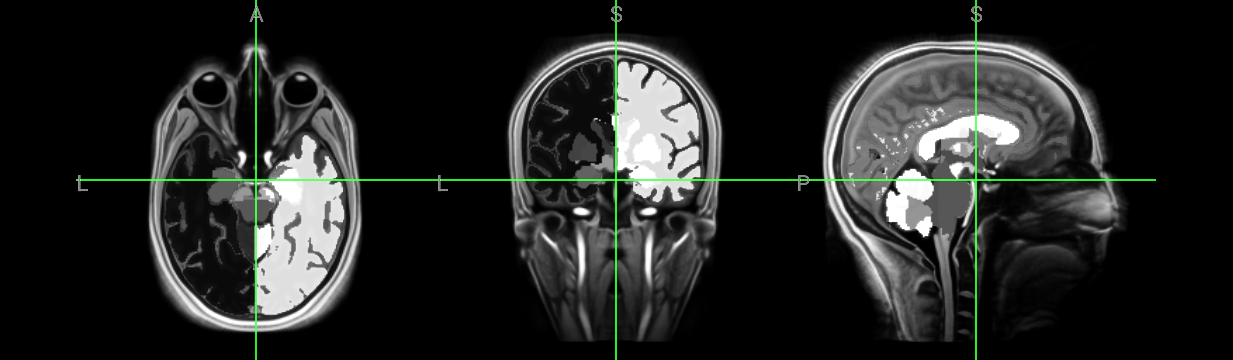

In [1]:
from IPython.display import Image
Image(filename='../../static/examples/structural_imaging/freesurfer/freesurfer_orig_aseg.png')

### Dependencies in Jupyter/Python
- Using the package [watermark](https://github.com/rasbt/watermark) to document system environment and software versions used in this notebook

In [10]:
%load_ext watermark

%watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2025-11-02T23:13:08.528046+00:00

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 5.4.0-204-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 32
Architecture: 64bit

ipyniivue: 2.3.2
IPython  : 8.16.1

